In [1]:
def average_precision(retrieved_items, relevant_items):
    rel_count = 0
    precisions = []

    for i, item in enumerate(retrieved_items, start=1):
        if item in relevant_items:
            rel_count += 1
            precision_at_i = rel_count / i
            precisions.append(precision_at_i)

    if precisions:
        avg_precision = sum(precisions) / len(precisions)
    else:
        avg_precision = 0.0


    return avg_precision


In [2]:
def average_recall(retrieved_items, relevant_items):
    rel_count = 0
    recalls = []

    for i, item in enumerate(retrieved_items, start=1):
        if item in relevant_items:
            rel_count += 1
            recall_at_i = rel_count / len(relevant_items)
            recalls.append(recall_at_i)

    if recalls:
        avg_recall = sum(recalls) / len(recalls)
    else:
        avg_recall = 0.0

    return avg_recall


In [3]:
retrieved_items = ['a', 'b', 'c', 'd', 'e', 'f']
relevant_items = ['a', 'c', 'e', 'g', 'i']

In [4]:
average_precision(retrieved_items, relevant_items)

0.7555555555555555

In [5]:
average_recall(retrieved_items, relevant_items)

0.4000000000000001

In [6]:
import matplotlib.pyplot as plt

def precision_at_k(retrieved_items, relevant_items, k):
    rel_count = len(set(retrieved_items[:k]) & set(relevant_items))
    return rel_count / k

def recall_at_k(retrieved_items, relevant_items, k):
    rel_count = len(set(retrieved_items[:k]) & set(relevant_items))
    return rel_count / len(relevant_items)

def plot_precision_recall_curve(retrieved_items, relevant_items):
    precisions = []
    recalls = []


    for i in range(1, len(retrieved_items) + 1):
        precisions.append(precision_at_k(retrieved_items, relevant_items, i))
        recalls.append(recall_at_k(retrieved_items, relevant_items, i))
    
    print(precisions)
    print(recalls)

    plt.figure(figsize=(10,6))
    plt.plot(recalls, precisions, marker='o')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.grid()
    plt.show()


[1.0, 0.5, 0.6666666666666666, 0.5, 0.6, 0.5]
[0.2, 0.2, 0.4, 0.4, 0.6, 0.6]


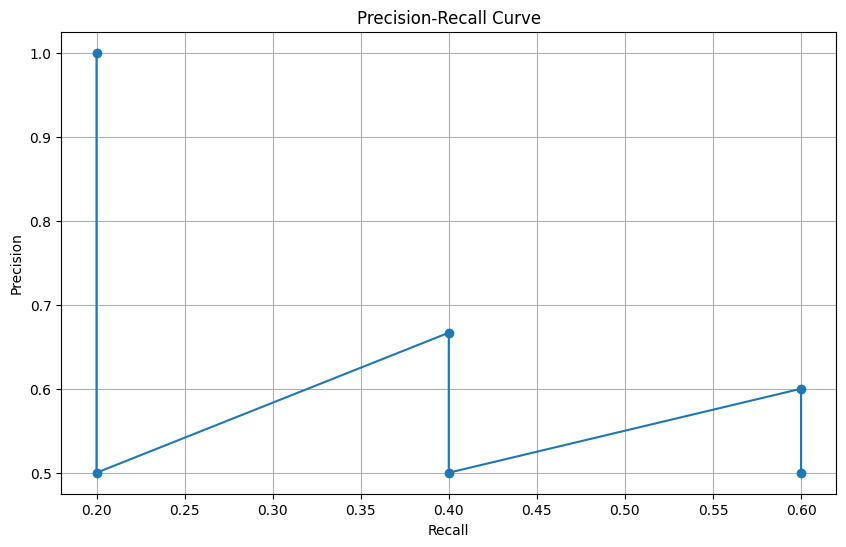

In [7]:
plot_precision_recall_curve(retrieved_items,relevant_items )

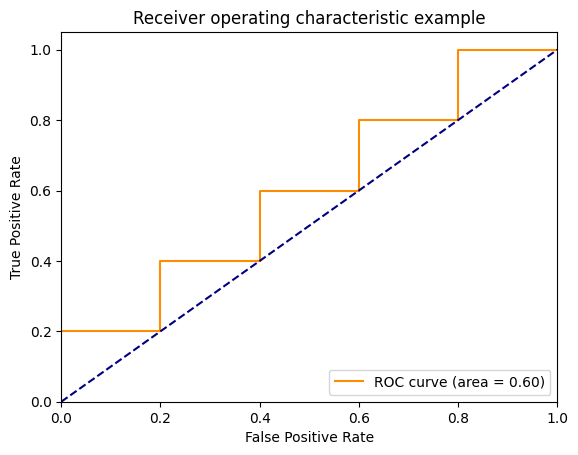

In [8]:
import matplotlib.pyplot as plt
from sklearn import metrics

# assuming retrieved_items and relevant_items from the previous example
retrieved_items = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
relevant_items = ['a', 'c', 'e', 'g', 'i']

# creating binary labels for our items
y_true = [1 if item in relevant_items else 0 for item in retrieved_items]

# for an ROC curve, we need scores rather than binary predictions, 
# let's assume the score is simply the reverse rank of the item in the retrieved list
y_scores = [len(retrieved_items) - i for i in range(len(retrieved_items))]

fpr, tpr, thresholds = metrics.roc_curve(y_true, y_scores)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
